In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
class linear_reg(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(linear_reg, self).__init__()
        self.layer1 = nn.Linear(1,1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [3]:
model = linear_reg()
sum([prms.numel() for prms in model.parameters()])

4

In [4]:
def data_creation(m):
    N = 50
    x = torch.randn(N, 1)
    # y = lambda m, x : (m * x) + torch.randn(N, 1)/2
    y = (m * x) + torch.randn(N, 1)/2
    return x, y

In [5]:
def train_model(x, y, model):
    epoch = 100
    losses = torch.zeros(epoch, requires_grad=False)

    lr = 0.05
    loss_fn = nn.MSELoss()
    model = linear_reg()

    optmzr = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch_i in range(epoch):

        y_hat = model(x)

        loss = loss_fn(y, y_hat)
        losses[epoch_i] = loss

        optmzr.zero_grad()
        loss.backward()
        optmzr.step()

    pred = model(x)

    return losses.detach(), pred

d:\Ed\Anaconda\envs\torch_py312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Ed\Anaconda\envs\torch_py312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


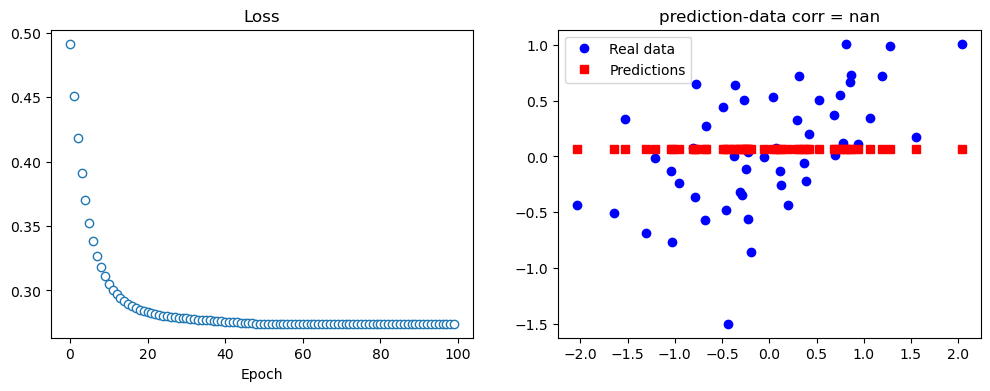

In [6]:
x, y = data_creation(.4)
loss, y_hat = train_model(x, y, linear_reg)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(loss.detach(), 'o', markerfacecolor='w', linewidth=0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real data')
ax[1].plot(x, y_hat.detach().numpy(), 'rs', label='Predictions')
ax[1].set_label('x')
ax[1].set_label('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T, y_hat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [7]:
slopes = torch.arange(-2,2,4/21)
numExps = 50

In [8]:
results = np.zeros((len(slopes), numExps, 2))

In [9]:
%%time
for slopei in range(len(slopes)):
    for N in range(numExps):
        x, y = data_creation(slopes[slopei])
        losses, y_hat = train_model(x, y, linear_reg)
        t = train_model(x, y, linear_reg)

        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, y_hat.detach().T)[0,1]

CPU times: total: 13.6 s
Wall time: 36.6 s


In [13]:
results[np.isnan(results)] = 0

In [21]:
results[:,:,1].mean(axis=0).shape, results[:,:,1].mean(axis=1).shape
# results[:,:,1].mean(axis=2).shape

((50,), (21,))

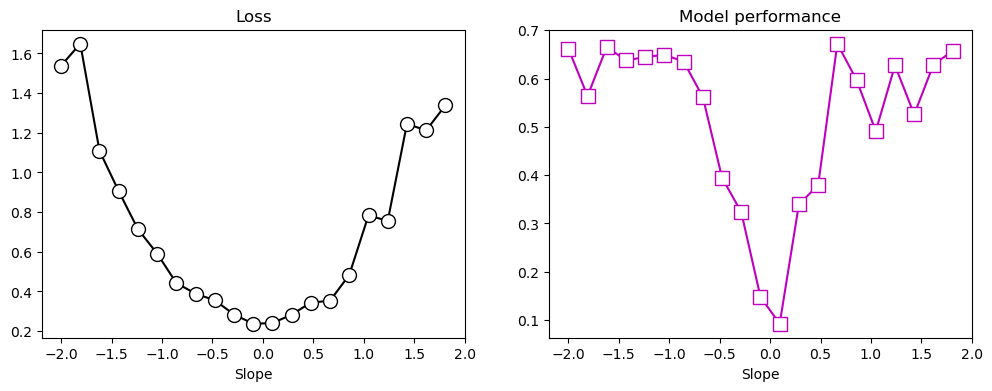

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(slopes, np.mean(results[:, :, 0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')


ax[1].plot(slopes, np.mean(results[:, :, 1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_title('Real-predicted correlation')

ax[1].set_title('Model performance')

plt.show()